# Problem(a)

Import dataset

In [21]:
# -*- coding: utf-8 -*-
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt

## Computer Tech

In [72]:
c1_graphics = ['comp.graphics']
c1_misc = ['comp.os.ms-windows.misc']
c1_pc = ['comp.sys.ibm.pc.hardware']
c1_mac = ['comp.sys.mac.hardware']
c1_graphics_train = fetch_20newsgroups(subset = 'train', categories = c1_graphics, shuffle=True, random_state=42)
c1_misc_train = fetch_20newsgroups(subset = 'train', categories = c1_misc, shuffle=True, random_state=42)
c1_pc_train = fetch_20newsgroups(subset = 'train', categories = c1_pc, shuffle=True, random_state=42)
c1_mac_train = fetch_20newsgroups(subset = 'train', categories = c1_mac, shuffle=True, random_state=42)

## Recreational Activity


In [ ]:
c2_autos = ['rec.autos']
c2_motocycle = ['rec.motorcycles']
c2_baseball = ['rec.sport.baseball']
c2_hockey = ['rec.sport.hockey']
c2_autos_train = fetch_20newsgroups(subset = 'train', categories = c2_autos, shuffle=True, random_state=42)
c2_motocycle_train = fetch_20newsgroups(subset = 'train', categories = c2_motocycle, shuffle=True, random_state=42)
c2_baseball_train = fetch_20newsgroups(subset = 'train', categories = c2_baseball, shuffle=True, random_state=42)
c2_hockey_train = fetch_20newsgroups(subset = 'train', categories = c2_hockey, shuffle=True, random_state=42)

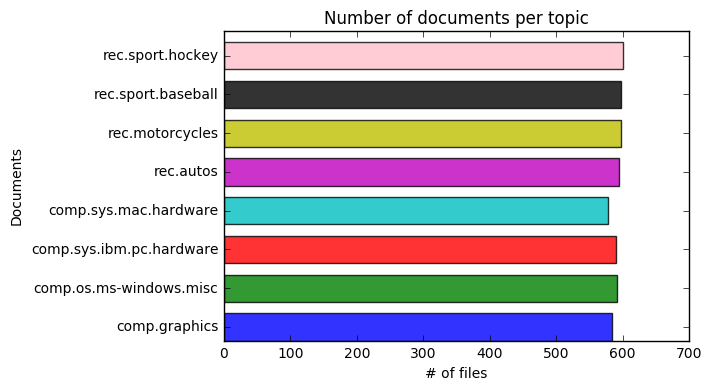

In [91]:
values = []
values = (len(c1_graphics_train.data), len(c1_misc_train.data),  len(c1_pc_train.data), len(c1_mac_train.data), len(c2_autos_train.data), len(c2_motocycle_train.data), len(c2_baseball_train.data), len(c2_hockey_train.data))
index = np.arange(8)
bar_width = 0.7
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink']
bars = plt.barh(index, values, bar_width,alpha = 0.8, color = color)
plt.xlabel('# of files')
plt.ylabel('Documents')
plt.title('Number of documents per topic')
plt.yticks(index + bar_width/2, ('comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey'))
plt.xlim(0,700)
plt.legend()
plt.show()

# Problem(b)

In [2]:
from sklearn.feature_extraction import text
import re
import nltk 
import string
# nltk.download()

In [9]:
stop_words = text.ENGLISH_STOP_WORDS

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def tokenizer_fun(text):
    new_text = re.sub(r'[^A-Za-z]', " ", text)
    tokens =[word for sent in nltk.sent_tokenize(new_text) for word in nltk.word_tokenize(sent)]
    new_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]{2,}', token):
            new_tokens.append(token)     
    stem = [stemmer.stem(t) for t in new_tokens]
    return stem

from sklearn.datasets import fetch_20newsgroups
all_data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=('headers','footers','quotes'))

from sklearn.feature_extraction.text import TfidfVectorizer
TFxIDF = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}',)
TFxIDF_data = TFxIDF.fit_transform(all_data.data)
count = TFxIDF_data.shape

print (count)

(18846, 72399)


In [18]:
print TFxIDF_data

  (0, 52902)	0.0830978323661
  (0, 19732)	0.0782058558488
  (0, 34880)	0.092844504626
  (0, 29073)	0.103660222972
  (0, 14491)	0.121979226031
  (0, 65419)	0.0548502807475
  (0, 29841)	0.115397414295
  (0, 48661)	0.160405516855
  (0, 4984)	0.097065404929
  (0, 55699)	0.0598990900044
  (0, 21550)	0.141524827565
  (0, 11598)	0.0801381263368
  (0, 33828)	0.0639533887412
  (0, 6695)	0.149246258053
  (0, 46821)	0.0991790629362
  (0, 66843)	0.0839667591186
  (0, 21172)	0.199408301472
  (0, 20291)	0.135415148972
  (0, 34890)	0.130150605062
  (0, 57732)	0.104108115326
  (0, 54354)	0.181564117965
  (0, 50958)	0.18039240989
  (0, 5440)	0.0645497791183
  (0, 67402)	0.0588931266997
  (0, 30728)	0.0455637444357
  :	:
  (18845, 14252)	0.0543966491976
  (18845, 22995)	0.102132669844
  (18845, 30248)	0.0675412727761
  (18845, 7255)	0.0729578290294
  (18845, 23669)	0.0614594234158
  (18845, 159)	0.056263091705
  (18845, 48071)	0.134206018683
  (18845, 8344)	0.0509283457917
  (18845, 6658)	0.070486395401

# Problem(c)

In [22]:
my_list=['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']

for category in my_list:
    categories = [category]
    sub_data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    TFxIDF_sub = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, max_features=10, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}')
    sub_count = TFxIDF_sub.fit_transform(sub_data.data)
    #print (sub_count)
    print (TFxIDF_sub.vocabulary_.keys())

[u'drive', u'problem', u'disk', u'work', u'card', u'mb', u'ani', u'scsi', u'use', u'control']
[u'ani', u'drive', u'know', u'like', u'problem', u'work', u'use', u'mac', u'appl', u'monitor']
[u'new', u'offer', u'drive', u'ship', u'sale', u'sell', u'includ', u'price', u'pleas', u'use']
[u'peopl', u'say', u'believ', u'church', u'jesus', u'think', u'god', u'christian', u'sin', u'know']


In [26]:
c2_autos_train.data = c2_autos_train.data[0:min1]
c2_motocycle_train.data = c2_motocycle_train.data[0:min1]
c2_baseball_train.data = c2_baseball_train.data[0:min1]
c2_hockey_train.data = c2_hockey_train.data[0:min1]

# Problem(d)

In [12]:
from sklearn.decomposition import TruncatedSVD
X = TruncatedSVD(n_components=50, algorithm='arpack')
LSI = X.fit_transform(TFxIDF_data)

In [14]:
print LSI.shape

(18846L, 50L)


# Problem(e)

In [23]:
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.ibm.pc.hardware','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']

def data_fun(train_or_test):
    if(train_or_test == 'train'):
        data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    if(train_or_test == 'test'):
        data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    return data  

def LSI_fun(train_or_test):
    if(train_or_test == 'train'):
        data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
        TFxIDF_sub = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}',)
        TFxIDF_sub_data = TFxIDF_sub.fit_transform(data.data)
        Y = TruncatedSVD(n_components=50, algorithm='arpack')
        sub_LSI = Y.fit_transform(TFxIDF_sub_data)
    if(train_or_test == 'test'):
        data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
        TFxIDF_sub = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}',)
        TFxIDF_sub_data = TFxIDF_sub.fit_transform(data.data)
        Y = TruncatedSVD(n_components=50, algorithm='arpack')
        sub_LSI = Y.fit_transform(TFxIDF_sub_data)
    return sub_LSI 

### Construct a training set

In [32]:
train_LSI = LSI_fun('train')
train_set = data_fun('train')
# separate into two groups(Computer Tech & Recreation)
train_target_group = [ int(x / 4) for x in train_set.target]

(4154L, 50L)


### Build a SVM classifier

In [29]:
from sklearn import svm
lin_svc = svm.LinearSVC()
lin_svc.fit(train_LSI, train_target_group)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### Construct a testing set

In [36]:
test_LSI = LSI_fun('test')
test_set = data_fun('test')
test_target_group = [ int(x / 4) for x in test_set.target]
svm_predicted = lin_svc.predict(test_LSI)
print test_target_group[0:40]-svm_predicted[0:40]
y_score = lin_svc.fit(train_LSI, train_target_group).decision_function(test_LSI)

[ 0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0 -1  0  0 -1  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0]


In [39]:
print y_score[0:20]
print y_score.shape, svm_predicted.shape

[ 0.5266311  -2.33651561  0.51440447 -1.10996801 -4.19977778  1.59296279
  0.51804172 -3.1877231  -0.58821794  0.68414301  0.21751829  1.00822408
  3.27310444  0.48167679  0.35646805  1.51483057  0.77646592  0.90276325
 -1.16861189  1.71183725]
(2765L,) (2765L,)


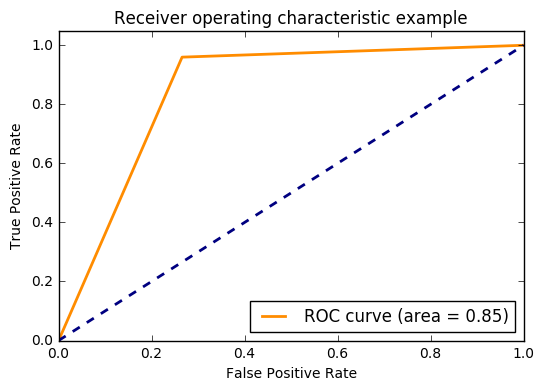

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(test_target_group, svm_predicted)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[ 863  312]
 [  64 1526]]
Normalized confusion matrix
[[ 0.73  0.27]
 [ 0.04  0.96]]


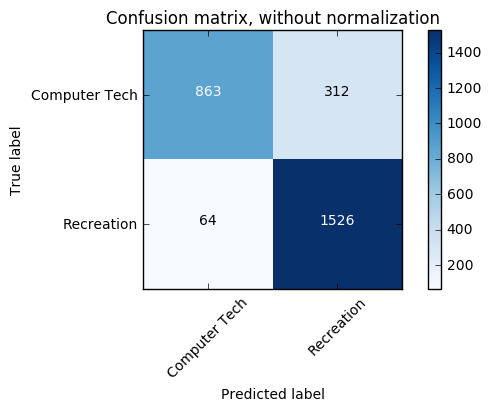

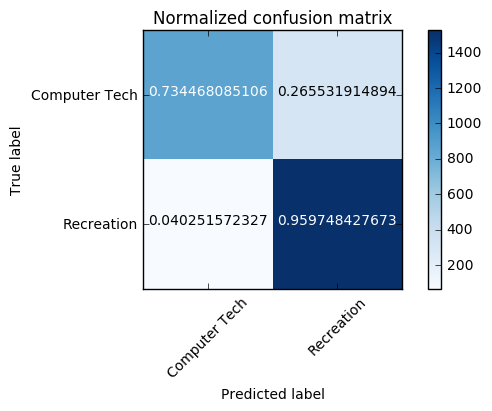

In [51]:
from sklearn.metrics import confusion_matrix
class_names = ['Computer Tech', 'Recreation']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, svm_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()